#            DIABETICS PREDICTION USING LOGISTIC REGRESSION 
                        PREDICTING WHETHER A PERSON HAS DIABETES OR NOT 
	
  

# Framing the Problem

The objective is to Predict whether a person has diabetes or not based on a number of labels or features: 
this includes: 
        
        Pregnancy : number of times pregnant
	        
        Glucose: glucose level
		
        Blood Pressure:  Diastolic blood pressure (mm Hg)
		
        Skin Thickness:  Triceps skin fold thickness (mm)
		
        Insulin: 2-Hour serum insulin (mu U/ml)
		
        BMI: Body Mass Index
		
        Diabetes Pedigree Function (DBF): A function that scores the likehood of diabetes based on family history
		
        Age: individual Age (years)
		
        Outcome: 0 = healthy individual, 1 = Diabetic individual
This will involve the use of a supervised learning model (linear regression e.t.c). 

It is a regression task as our objective is to predict the outcome label ( 1 or 0).

Furthermore, it will use Batch Learning as it the model will be trained on all our current available data.

# Getting the Data

we will be using a kaggle dataset that was madee available by National Institute of Diabetes 

and Digestive and Kidney Diseases” as part of the Pima Indians Diabetes Database.

steps to be done:

          (a) Convert the data to a format you can easily manipulate (ex: changing to all numerical)
		  (b) Check the size and type of data (time series, sample).
		  (C) Sample a test set, put it aside. 

In [13]:
import pandas as pd 
import numpy as np 
diabetes = pd.read_csv('diabetes.csv')
#x includes every single column aside from Outcome (what we are trying to predict)
x = diabetes.drop('Outcome', axis = 1)
#y is our Outcome - either a 0 or 1 (diabetic or not diabetic)
y = diabetes["Outcome"]

#checking to see if every column in data frame is all numerical before moving on 
#returns True if all column is Numeric 
diabetes.shape[1] == diabetes.select_dtypes(include=np.number).shape[1]


True

Data is all Numerical - so we can move to the next step

# Explore the data: 

in this step we will try to get meaningful insight into our data any correlation between attributes 

steps to be done: 

          (a): Study each attribute and its characteristics ( this includes the Name, Type(int/ float, text, structured)
		  and identify correlation between attributes 
          
		  (b): check the % of missing values in data

		  (c): we Study how we would solve this problem manually.
		  (d): Identify extra data that would be useful (maybe in improving model performance)

		  (e): we are going to outline the usefulness of the task/steps done above
		  (f): Document what you have learned from Data exploration

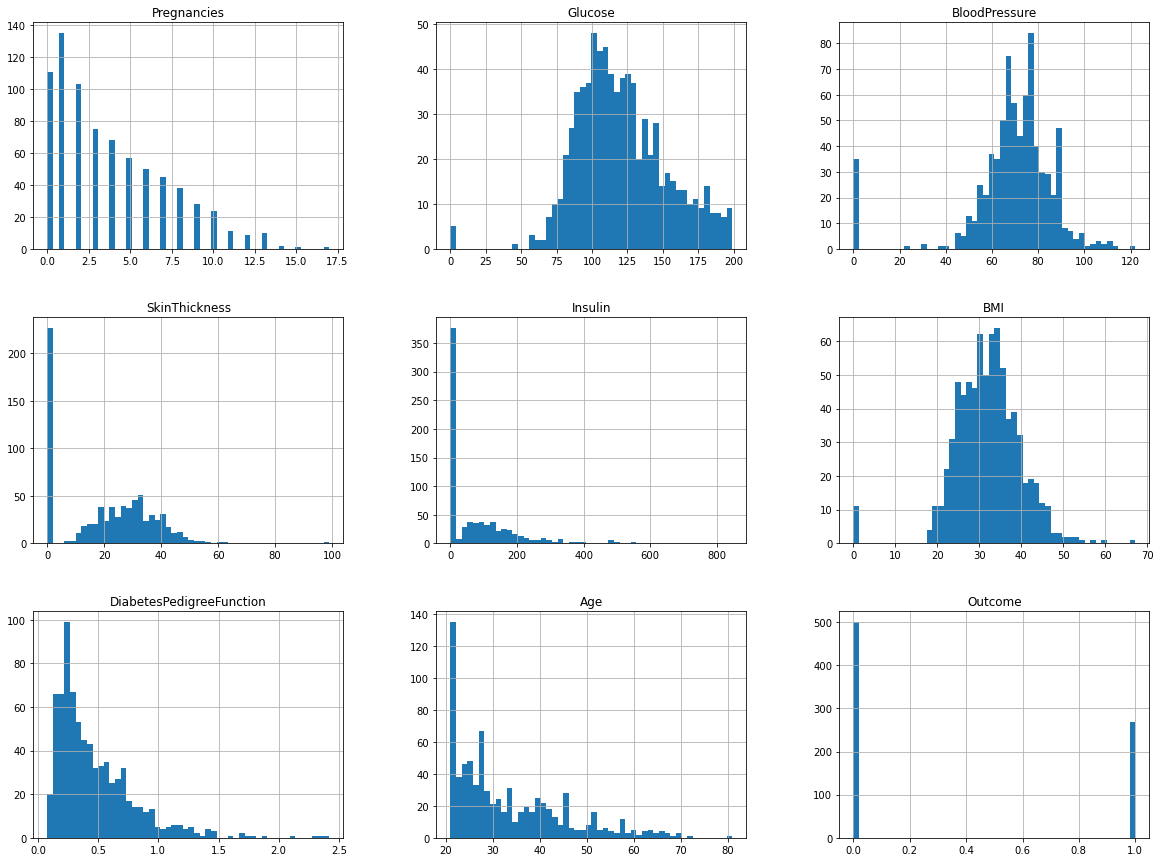

In [14]:
#plot histogram for each numerical attribute  
%matplotlib inline
import matplotlib.pyplot as plt
diabetes.hist(bins=50, figsize=(20,15))
plt.show()

In [18]:
#we are going to check for any missing values in our data 
if all(diabetes.isna().sum()) == 0:
    print('True')
else: 
    print('False')

True


In [19]:
#this would be a case of multiple linear regression 
#y = b0 + b1x1 + b2x2 + ...+bnxn

# DATA PREPARATION:
	In this step we get the data ready for machine learning 
    
    steps to be done: 
	
    1. Data cleaning:
		Fix or remove outliers (optional).
		Fill in missing values (e.g., with zero, mean, median…) or drop their rows (or
		columns)
	2. Feature selection (optional):
		Drop the attributes that provide no useful information for the task.

	3. Feature engineering, where appropriate:
		Discretize continuous features.

		Decompose features (e.g., categorical, date/time, etc.).
		Add promising transformations of features (e.g., log(x), sqrt(x), x^2, etc.).
		Aggregate features into promising new features.

	4. Feature scaling:
		Standardize or normalize features.

* No missing values in dataset
* feature scaling taken care of in next section 

* We need to now work on corr matrix - see correlation between various attributes and also try attribute combination and because we have some tail heavy distribution we can try to transform them - this includes (Age, DiabetesPedigreeFunction and maybe pregnancies)

# Shortlisting Promising Models

Steps to be done:

	(1). splitting up out training and test data and applying various models

	(2). Performance Measure
		For Perfomance measure it depends on the data - but we consider both
		(a): MAE (Mean absolute Error)
		(b): RMSE ( Root MEan square Error)
	(3). Analyze the most significant variables for each algorithm.

	(4). Analyze the types of errors the models make and What data would a human have used to avoid these errors?

	(5). Perform a quick round of feature selection and engineering.

	(6). Perform one or two more quick iterations of the five previous steps.

	(7). Shortlist the top three to five most promising models, preferring models that
	make different types of errors.

In [21]:
from sklearn.pipeline import Pipeline

#modelling 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler



# FINE TUNING SYSTEM
	


# PRESENT SOLUTION:

	In this step we are going to document what we have done, describing what worked and what did not, and system limitations
    
    https://www.kaggle.com/rajatshah/scikit-learn-ml-from-start-to-finish

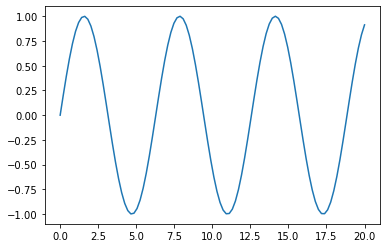

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 20, 100)
plt.plot(x, np.sin(x))
plt.show()

In [6]:
import pandas as pd
df = pd.read_csv('diabetes.csv')
df.sample(100)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
678,3,121,52,0,0,36.0,0.127,25,1
637,2,94,76,18,66,31.6,0.649,23,0
755,1,128,88,39,110,36.5,1.057,37,1
401,6,137,61,0,0,24.2,0.151,55,0
215,12,151,70,40,271,41.8,0.742,38,1
...,...,...,...,...,...,...,...,...,...
28,13,145,82,19,110,22.2,0.245,57,0
135,2,125,60,20,140,33.8,0.088,31,0
268,0,102,52,0,0,25.1,0.078,21,0
496,5,110,68,0,0,26.0,0.292,30,0


In [7]:
from sklearn import preprocessing

In [8]:
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
encoded_value = le.fit_transform(["paris", "paris", "tokyo", "amsterdam"])
print(encoded_value)

[1 1 2 0]
